He realizado 6 retos.

Recomiendo encarecidamente leer este documento en formato notebook mediante el siguiente enlace:

https://colab.research.google.com/drive/14gc78_BjOGWyZhHxGJ6Q_O5eHHFCTN5D#scrollTo=Y0hOnmSm10_-

El formato pdf corta los comentarios y muestra unas gráficas de malisima calidad.

# 01 Implementa el algoritmo de la Criba de Erastótenes para encontrar número primos. Encuentra los números primos entre los 10.000 primeros números naturales

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Criba de Erastótenes
# Escribe a ti tu código
def erastotenes(n):                                 # el único input que recibe

    tachados = set()                                # los tachados o no primos, seran un set
    primos = [1]                                    # dentro de los primos (lista) meto el 1, pero podría ser vacio

    for num in range(2, n+1):                       # dentro del rango de 2 al n este incluido

        if num in tachados:                         # si el numero no es primo, continua al siguinte bucle
            continue
        else:                                       # si no, ejecuta el siguiente código
            primos.append(num)                      # es un numero primo. Se añade a la lsita
            for no_primo in range(num, n+1, num):   # se tachan todos sus múltiplos
                tachados.add(no_primo)

    return pd.Series(dict(enumerate(primos)))       # devulevo un pandas series con los numeros primos enumerados, lo que me permite acceder al indice y alos valores

primeros_10000_primos = erastotenes(10_000)

for key, value in primeros_10000_primos.items():
    print(f'{key} ---> {value}')

# print(len(primeros_10000_primos))

0 ---> 1
1 ---> 2
2 ---> 3
3 ---> 5
4 ---> 7
5 ---> 11
6 ---> 13
7 ---> 17
8 ---> 19
9 ---> 23
10 ---> 29
11 ---> 31
12 ---> 37
13 ---> 41
14 ---> 43
15 ---> 47
16 ---> 53
17 ---> 59
18 ---> 61
19 ---> 67
20 ---> 71
21 ---> 73
22 ---> 79
23 ---> 83
24 ---> 89
25 ---> 97
26 ---> 101
27 ---> 103
28 ---> 107
29 ---> 109
30 ---> 113
31 ---> 127
32 ---> 131
33 ---> 137
34 ---> 139
35 ---> 149
36 ---> 151
37 ---> 157
38 ---> 163
39 ---> 167
40 ---> 173
41 ---> 179
42 ---> 181
43 ---> 191
44 ---> 193
45 ---> 197
46 ---> 199
47 ---> 211
48 ---> 223
49 ---> 227
50 ---> 229
51 ---> 233
52 ---> 239
53 ---> 241
54 ---> 251
55 ---> 257
56 ---> 263
57 ---> 269
58 ---> 271
59 ---> 277
60 ---> 281
61 ---> 283
62 ---> 293
63 ---> 307
64 ---> 311
65 ---> 313
66 ---> 317
67 ---> 331
68 ---> 337
69 ---> 347
70 ---> 349
71 ---> 353
72 ---> 359
73 ---> 367
74 ---> 373
75 ---> 379
76 ---> 383
77 ---> 389
78 ---> 397
79 ---> 401
80 ---> 409
81 ---> 419
82 ---> 421
83 ---> 431
84 ---> 433
85 ---> 439
86 ---> 4

# 02 Algoritmo de las N reinas

In [ ]:
def colocar_reina(m, fila, col ,tab):

    '''
    esta funcion coloca una reina en un tablero de ajedrez donde las posiciones que no estan en peligro son 0s, la casilla donde se coloca la reina será un numero de un dígito,
    y las casillas en peligro serán un numero de dos digitos. La función devuelve el tablero con la nueva reina colocada y sus posiciones de peligro.
    '''
    # las zonas en peligro seran m +10 para que tenga dos digitos y se pueda diferenciar
    tab[fila,:] = m +10                                                 # zona de peligro horizontal
    tab[:, col] = m +10                                                 # zona de peligro vertical

    # colocamos la reina
    tab[fila, col] = m

    # las diagonales
    diag_c1 = min((tab.shape[0]-1)-col,fila)
    diag_c2 = min(col,fila)
    diag_c3 = min(col, (tab.shape[0]-1)-fila)
    diag_c4= min((tab.shape[0]-1)-col, (tab.shape[0]-1)-fila)

    # cuadrante 1
    for n in range(1,diag_c1+1):
        tab[fila -n, col + n] = m +10

    # cuadrante 2
    for n in range(1,diag_c2+1):
        tab[fila -n, col-n] = m +10

    # cuadrate 3
    for n in range(1,diag_c3+1):
        tab[fila +n, col-n] = m +10

    # cuadrante 4
    for n in range(1,diag_c4+1):
        tab[fila +n, col+n] = m +10

    return tab

def factible_choices(tablero):

    '''
    Esta función recibe un tablero con n reinas y devuelve las posiciones del tablero las cuales no estan en peligro,
    va mirando por fila y columna si la casilla de analisis es = 0 entonces la mete en la lista de posiciones factibles
    '''

    fact_choices = []
    size = tablero.shape[0]

    for fila in range(size):

        if 0 not in tablero[fila,:]:
            continue

        for col in range(size):

            if 0 not in tablero[:, col]:
                continue

            if tablero[fila,col] == 0:
                fact_choices.append([fila, col])

    return fact_choices


def n_reinas(n, tablero):

    import random

    '''
    Esta funcion recibe un tablero y una cantidad de reinas determinada y devuelve UNA SOLUCIÓN.
    La solución encontrada es aleatoria por lo que no siempre devuelve la misma solucíon. Si hay suerte
    puede encontrar una solución para un número relativamente elevado de reinas (mi record es 18)
    '''

    if n<1:
        return True

    if np.count_nonzero(tablero == 0) < n:
        return False

    casillas_factibles = factible_choices(tablero)
    tablero_viejo = tablero.copy()

    while len(casillas_factibles) >0:

        casilla_elegida = random.choice(casillas_factibles)
        fila = casilla_elegida[0]
        col = casilla_elegida[1]
        tablero_nuevo = colocar_reina(np.random.randint(low= 1, high= 10), fila, col, tablero)

        if n_reinas(n-1, tablero_nuevo):
            print(casilla_elegida)
            return True

        else:
            casillas_factibles.remove(casilla_elegida)
            tablero = tablero_viejo.copy()

    return False



## comprobando la función colocar reina

In [ ]:
tablero = np.zeros(16).reshape(4,4)
print(tablero)
print(np.count_nonzero(tablero== 0)) # cuento la cantidad de 0 que quedan en el tablero
print('\n')

print(colocar_reina(1,1,0, tablero))
print(np.count_nonzero(tablero== 0))
print('\n')

print(colocar_reina(3,3,1, tablero))
print(np.count_nonzero(tablero== 0))
print('\n')
print(colocar_reina(9,0,2, tablero))
print(np.count_nonzero(tablero== 0))
print('\n')
print(colocar_reina(2,2,3, tablero))
print(np.count_nonzero(tablero== 0))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
16


[[11. 11.  0.  0.]
 [ 1. 11. 11. 11.]
 [11. 11.  0.  0.]
 [11.  0. 11.  0.]]
6


[[11. 13.  0.  0.]
 [ 1. 13. 11. 13.]
 [13. 13. 13.  0.]
 [13.  3. 13. 13.]]
3


[[19. 19.  9. 19.]
 [ 1. 19. 19. 19.]
 [19. 13. 19.  0.]
 [13.  3. 19. 13.]]
1


[[19. 12.  9. 12.]
 [ 1. 19. 12. 12.]
 [12. 12. 12.  2.]
 [13.  3. 12. 12.]]
0


In [ ]:
tab = np.zeros(64).reshape(8,8)
print(tab)
print('\n')
print(colocar_reina(3,7,4,tab))
print('\n')
print(colocar_reina(2,1,0,tab))
print('\n')
print(colocar_reina(1,6,1,tab))
print('\n')
print(colocar_reina(5,0,2,tab))
print('\n')
print(colocar_reina(9,3,3,tab))
print('\n')
print(colocar_reina(7,4,5,tab))
print('\n')
print(colocar_reina(8,2,6,tab))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


[[ 0.  0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0.  0.  0. 13.  0.  0.  0.]
 [13.  0.  0.  0. 13.  0.  0.  0.]
 [ 0. 13.  0.  0. 13.  0.  0. 13.]
 [ 0.  0. 13.  0. 13.  0. 13.  0.]
 [ 0.  0.  0. 13. 13. 13.  0.  0.]
 [13. 13. 13. 13.  3. 13. 13. 13.]]


[[12. 12.  0.  0. 13.  0.  0.  0.]
 [ 2. 12. 12. 12. 12. 12. 12. 12.]
 [12. 12.  0.  0. 13.  0.  0.  0.]
 [12.  0. 12.  0. 13.  0.  0.  0.]
 [12. 13.  0. 12. 13.  0.  0. 13.]
 [12.  0. 13.  0. 12.  0. 13.  0.]
 [12.  0.  0. 13. 13. 12.  0.  0.]
 [12. 13. 13. 13.  3. 13. 12. 13.]]


[[12. 11.  0.  0. 13.  0.  0. 11.]
 [ 2. 11. 12. 12. 12. 12. 11. 12.]
 [12. 11.  0.  0. 13. 11.  0.  0.]
 [12. 11. 12.  0. 11.  0.  0.  0.]
 [12. 11.  0. 11. 13.  0.  0. 13.]
 [11. 11. 11.  0. 12.  0. 13.  0.]
 [11.

## resolviendo diferentes tableros

In [ ]:
import time

In [ ]:
reinas = 4
tablero = np.zeros((reinas,reinas), dtype= int)

n_reinas(reinas, tablero)

[1, 3]
[2, 0]
[0, 1]
[3, 2]


True

In [ ]:
reinas = 6
tablero = np.zeros((reinas,reinas), dtype= int)
init_time = time.time()
n_reinas(reinas, tablero)
fin_time = time.time()
print('\n')
print(fin_time-init_time)

[2, 1]
[0, 2]
[5, 3]
[4, 0]
[3, 4]
[1, 5]


0.01995110511779785


In [ ]:
reinas = 8
tablero = np.zeros((reinas,reinas), dtype= int)

init_time = time.time()
n_reinas(reinas, tablero)
fin_time = time.time()
print('\n')
print(fin_time-init_time)

[6, 3]
[2, 0]
[0, 4]
[1, 6]
[7, 1]
[3, 2]
[4, 7]
[5, 5]


0.11321210861206055


In [ ]:
reinas = 10
tablero = np.zeros((reinas,reinas), dtype= int)

init_time = time.time()
n_reinas(reinas, tablero)
fin_time = time.time()
print('\n')
print(fin_time-init_time)

[6, 4]
[3, 2]
[5, 1]
[8, 3]
[1, 7]
[0, 0]
[4, 8]
[7, 9]
[9, 6]
[2, 5]


0.031913042068481445


In [ ]:
reinas = 12
tablero = np.zeros((reinas,reinas), dtype= int)

init_time = time.time()
n_reinas(reinas, tablero)
fin_time = time.time()
print('\n')
print(fin_time-init_time)

[1, 7]
[10, 5]
[6, 0]
[3, 2]
[0, 4]
[2, 10]
[9, 11]
[5, 6]
[11, 8]
[8, 1]
[7, 3]
[4, 9]


0.14563608169555664


In [ ]:
reinas = 14
tablero = np.zeros((reinas,reinas), dtype= int)

init_time = time.time()
n_reinas(reinas, tablero)
fin_time = time.time()
print('\n')
print(fin_time-init_time)

[9, 5]
[10, 3]
[7, 8]
[12, 9]
[3, 13]
[11, 6]
[6, 12]
[4, 2]
[13, 7]
[8, 0]
[5, 4]
[0, 11]
[2, 10]
[1, 1]


1.1377284526824951


# 03 DESCENSO DEL GRADIENTE

## Implementación con enfoque analítico (Esta implementación no esta pensada para trabajar con datos, esta se realizará después)

In [ ]:
import numpy as np
from sympy import diff, symbols, sin, cos
import matplotlib.pyplot as plt

In [ ]:
# Esta funcion calcula el gradiente para cualquier funcion, dada una funcion lambda y la lista de sus correspondientes variables
def gradiente(funcion_lambda, lista_variables:list):

    import numpy as np
    from sympy import diff, symbols, lambdify

    gradiente = {}                                                      # el gradiente será un diccionario donde las claves seran la funcion escrita y los valores, la funcion gradiente de cada componente
    simb_var = symbols(lista_variables)                                 # guardo los simbolos de las variables que utilizaré después

    for variable in lista_variables:                                    # para cada variable en mi lista de variables vamos a calcular su derivada parcial

        derivada_parcial = diff(funcion_lambda(*simb_var), variable)    # se crea la funcion gradiente 'escrita', es necesario desempaquetar todas las variables para darselas a la funcion lambda
        f_dev_parcial = lambdify(simb_var, derivada_parcial)            # comvierto la funcion 'escrita' en otra funcion lambda, que es la derivada parcial de la variable correspondiente
        gradiente[derivada_parcial] = f_dev_parcial                     # añado a mi diccionario tanto la derivada 'escrita' (llave), como la derivada en formato lambda (valor)

    return gradiente                                                    # devuelvo el diccionario de mis derivadas parciales, que juntas, conforman el vector gradiente



# esta funcion calcula el descenso por gradiente dandole una funcion lambda su lista de variables, el punto inicial, el learning rate, la precision, y un maximo de iteraciones
def gradient_descent(funcion_lambda, lista_variables:list, punto_inicial:list, rate:float, precision:float, maxit:int):

    x = np.array(punto_inicial).astype(float)                           # comvierto el punto en un array y lo paso a float para que no me de problemas
    grad_f = gradiente(funcion_lambda, lista_variables)                 # calculo mi gradiente que tiene los componenetes

    if len(grad_f) == 1:                                                # si mi vector gradiente es UNIVARIALBLE (solo x) ejecuta el siguiente código

        for epoca in range(maxit):                                      # para cada epoca

            for componente in grad_f.values():                          # este mini bucle me permite asignarle un punto a mi gradiente univariable, es para acceder al valor del diccionario
                grad = np.array(componente(x))

            norm_grad = np.linalg.norm(grad)                            # calculo la norma de mi vector de un solo componente

            if norm_grad < precision:                                   # si el valor obtenido esta por debajo de la precision requerida ROMPE el bucle
                break

            x -= rate*grad                                              # se actualiza el valor del nuestro punto

    else:                                                               # si vector gradiente es MULTIVARIABLE (x,y,z, etc.) ejecuta el siguiente código

        for epoca in range(maxit):                                      # para cada época

            grad = np.array([componente(*x) for componente in grad_f.values()])     # le asigno el punto de análisis a mi vector gradiente y me devuelve el punto objetivo en forma de array
            norm_grad = np.linalg.norm(grad)                                        # calculo la norma de mi vector gradiente multivariable

            if norm_grad < precision:                                   # si la norma esta por debajo de mi umbral ROMPE el bucle
                break

            x -= rate*grad                                              # se actualiza el punto de análisis

    return x                                                            # se devuleve el último punto de analisis


### PARA LA FUNCIÓN: sin(1/2∗x2−1/4∗y2+3)∗cos(2∗x+1−ey)

In [ ]:
from math import e
print(e)

2.718281828459045


In [ ]:

x0 = [1, 1]                             # Valor inicial
gamma = 0.1                             # Ratio de aprendizaje
tol = 1e-10                             # Tolerancia o precision
maxit = 1000000                         # Número máximo de iteraciones

f1 = lambda x, y: sin(0.5*x**2 - 0.25*y**2+3)*cos(2*x + 1 - e**y)          # las variables de la funcionsp.sin(0.5*x**2 - 0.25*y**2+3)*sp.cos(2*x + 1 - e**y)
variables =  ['x','y']                  # las variables de la funcion

result = gradient_descent(f1,variables , x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f1, variables).keys())[0]}, {list(gradiente(f1, variables).keys())[1]})')
print("Aproximación de x que cumple ∇F(x) ≈ 0:", result)

El gradiente = (1.0*x*cos(-2.71828182845905**y + 2*x + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) - 2*sin(-2.71828182845905**y + 2*x + 1)*sin(0.5*x**2 - 0.25*y**2 + 3), 1.0*2.71828182845905**y*sin(-2.71828182845905**y + 2*x + 1)*sin(0.5*x**2 - 0.25*y**2 + 3) - 0.5*y*cos(-2.71828182845905**y + 2*x + 1)*cos(0.5*x**2 - 0.25*y**2 + 3))
Aproximación de x que cumple ∇F(x) ≈ 0: [1.91058158 1.73634801]


### OTROS ejemplos de uso de esta implementación

#### $$f(x, y) = x^2 + y^2$$

In [ ]:
# Ejemplo de uso
# Supongamos que queremos minimizar la función f(x, y) = x^2 + y^2
# El gradiente de f(x, y) es ∇f(x, y) = [2x, 2y]

x0 = [1, 1]                             # Valor inicial
gamma = 0.1                             # Ratio de aprendizaje
tol = 1e-10                             # Tolerancia o precision
maxit = 1000000                         # Número máximo de iteraciones

f1 = lambda x, y: x**2 + y**2           # la funcion a la que voy a aplicar el descenso por gradiente, en este caso multivarialbe
variables =  ['x','y']                  # las variables de la funcion

result = gradient_descent(f1,variables , x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f1, variables).keys())[0]}, {list(gradiente(f1, variables).keys())[1]})')
print("Aproximación de x que cumple ∇F(x) ≈ 0:", result)

El gradiente = (2*x, 2*y)
Aproximación de x que cumple ∇F(x) ≈ 0: [3.41757926e-11 3.41757926e-11]


####  $$g(x, y) = x2 + y3 + 3xy + 1$$

In [ ]:
x0 = [-1,1]
gamma = 0.01
tol = 1e-12
maxit = int(1e5)


f3 = lambda x, y: x**2 + y**3 + 3*x*y + 1            # la funcion a la que voy a aplicar el descenso por gradiente, en este caso multivariable
variables =  ['x', 'y']                              # las variables de la funcion

result = gradient_descent(f3, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f3, variables).keys())[0]}, {list(gradiente(f3, variables).keys())[1]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (2*x + 3*y, 3*x + 3*y**2)
Aproximación de x que cumple ∇F: [-2.25  1.5 ]


$$f(x) = 3x4 + 4x3 − 12x2 + 7$$

In [ ]:
x0 = [0]                                                # cambiamos el punto inicial a 0
gamma = 0.001                                           # el learning rate vuelve a ser el inicial
tol = 1e-12
maxit = int(1e5)


f2 = lambda x: 3*x**4 + 4*x**3 - 12*x**2 + 7            # la funcion a la que voy a aplicar el descenso por gradiente, en este caso univariable
variables =  ['x']                                      # las variables de la funcion

result = gradient_descent(f2, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f2, variables).keys())[0]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (12*x**3 + 12*x**2 - 24*x)
Aproximación de x que cumple ∇F: [0.]


## 04 ENFOQUE DE DATOS: implementación para regresion líneal

In [ ]:
def generar_datos(f= lambda x: 0.5*x +10):
    import numpy as np

    x = np.linspace(0,5)
    ruido_varianza= 0.75
    y = f(x) + np.random.randint(low = -500, high= 500, size = x.shape[0])*ruido_varianza

    return np.array([x,y])

def batch_gradient_descent(cost_func, variables_lst, learning_rate, max_iter, precision):
    import random

    w = random.random()
    b = random.random()

    cost_grad = gradiente(cost_func, variables_lst)         # calculo el gradiente
    lista_de_grad = list(cost_grad.keys())
    cost_grad_f = [cost_grad[lista_de_grad[0]], cost_grad[lista_de_grad[1]]]               # el primer valor del diccionario de gradientes es mi derivada respecto a w

    print('Los componentes del gradiente de la función de coste: \n')
    print(f'derivada parcial de w: {lista_de_grad[0]}')
    print(f'derivada parcial de b: {lista_de_grad[1]}\n')

    w_ = 1000
    b_ = 50

    print('Se debe converger hacia los siguientes coeficientes: \n')
    print(f'El peso w: {w_}')
    print(f'El sesgo b: {b_}')

    data = generar_datos(f= lambda x: x*w_ + b_)                 # datos a partir de una funcion con ruido añadido; W y b COMVERGERÁN AL MULTIPLO DE X EN ESTE CASO 10
    x = data[0]
    y = data[1]

    for epoch in range(max_iter):

        error = np.sum(cost_func(w, b, x, y))

        w -= learning_rate*(np.sum(cost_grad_f[0](w, b, x, y)))
        b -= learning_rate*(np.sum(cost_grad_f[1](w, b, x, y)))

        new_error = np.sum(cost_func(w, b, x, y))

        if abs(error - new_error) < precision:
            print(f'\nSe ha logrado la convergencia en la época número {epoch}')
            break

    p = np.array([w, b])
    return p


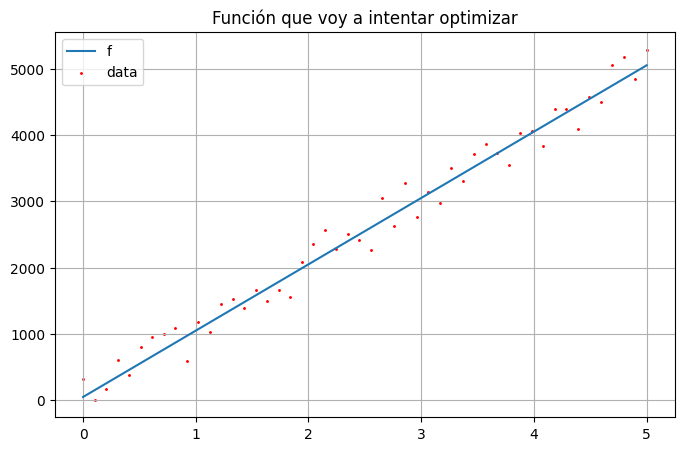

In [ ]:
data = generar_datos(f= lambda x: 1000*x + 50)

x = data[0]
y = data[1]

fig = plt.figure(figsize = (8, 5))

plt.plot(x,
         1000*x + 50,
        label = 'f')

plt.scatter(x,y, c = 'red', s = 1.1, label = 'data')
plt.grid()
plt.legend()
plt.title('Función que voy a intentar optimizar')

plt.show()

In [ ]:
batch_gradient_descent(lambda w, b, x, y: (np.sum(np.array(y) - (w*np.array(x) + b)))**2, ['w', 'b','x', 'y'], 0.0001, 10_000, 0.0001)

Los componentes del gradiente de la función de coste: 

derivada parcial de w: -2*x*(-b - w*x + y)
derivada parcial de b: 2*b + 2*w*x - 2*y

Se debe converger hacia los siguientes coeficientes: 

El peso w: 1000
El sesgo b: 50

Se ha logrado la convergencia en la época número 4107


array([997.6774297 ,  44.49931908])

#### NOTA: si se baja el ruido del algoritmo, se llegará a una convergencia mucho más precisa

# 05 MEJORA RECOCIDO SIMULADO

## descargando el problema de viajero

In [1]:
#Hacer llamadas http a paginas de la red
!pip install requests

#Modulo para las instancias del problema del TSP
!pip install tsplib95

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random                     #Para generar valores aleatorios


#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)



In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



## Funciones básicas

In [4]:
#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]                                         # introduce en forma de lista el nodo número 0 en la solución

  for ciudad in Nodos[1:]:                                      # para cada ciudad exceptuando la ciudad 0

    solucion  +=  [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]   # le añade a la solución una eleccion aleatoria sin que estas se repitan
  return solucion                                               # devuelve la solución, es decir, un recorrido aleatorio por todas las ciudades


#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):                                    # recibe como argumentos dos ciudades y todo el conjunto de ciudades
  return problem.get_weight(a,b)                                # devuelve la distancia que hay entre dos ciudades


#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):                         # recibe como argumento la solución aleatoria y todo el conjunto de ciudades con sus respectivas distancias
  distancia_total = 0                                           # se inicia la variable distancia

  for i in range(len(solucion)-1):                              # para cada ciudad en nuestra solución, menos la última
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)                 # se suma la distancia de cada ciudad en nuestra solución

  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)   # al final se devuelve la distancia total más la distancia de la última ciudad hasta la primera

#SIMULATED ANNEALING

## implementacion antigua

Para establecer una comparativa entre la implementación vieja y la nueva

In [5]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [6]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  # print("La mejor solución encontrada es " , end="")
  # print(mejor_solucion)
  # print("con una distancia total de " , end="")
  # print(mejor_distancia)
  return mejor_distancia, mejor_solucion

sol  = recocido_simulado(problem, 10000000)
sol[0]

2047

## Simulated annealing con multi arranque

Lo que hacemos aqui es basicamente repetir el proceso varias veces, guardar las soluciones en una lista y después printar la mejor solucion. Una especie de simulación de montecarlo

In [7]:
soluciones = [recocido_simulado(problem, 10_000_000) for n in range(1000)]
print(min(soluciones))

# la mejor solución encontrada (1547, [0, 32, 34, 33, 20, 35, 36, 17, 31, 27, 4, 3, 2, 28, 29, 30, 38, 22, 24, 40, 21, 39, 10, 12, 18, 26, 11, 25, 41, 23, 9, 8, 6, 5, 13, 19, 14, 16, 15, 37, 7, 1])

(1638, [0, 28, 29, 30, 32, 34, 20, 33, 35, 36, 37, 15, 16, 14, 17, 31, 7, 1, 3, 2, 8, 9, 39, 21, 40, 24, 22, 38, 23, 41, 25, 11, 12, 18, 10, 27, 4, 26, 5, 19, 13, 6])


## IMPLEMENTACIÓN MEJORADA

Con esta implementación reduzco la aleatoriedad de la generación de vecinos, aplicando una función de rentabilidad o coste; esta vez solo se va a prodocir el intercambio de ciudades si reduce la distancia total recorrida.

In [8]:
def genera_vecina_menos_aleatoria(solucion, problem):
  '''
  Esta funcion únicamente devolverá una solución si la distancia que hay entre las ciudades
  intercambiadas y sus vecinas más proximas es menor a la solución original
  '''

  while True:
    #Se eligen dos nodos aleatoriamente
    i,j = sorted(random.sample( range(1,len(solucion)-1) , 2))

    distancia_i_menos_uno_i = problem.get_weight(solucion[i-1], solucion[i])
    distancia_i_i_mas_uno = problem.get_weight(solucion[i], solucion[i+1])
    distancia_ciudades_vecinas_i_i = distancia_i_menos_uno_i + distancia_i_i_mas_uno

    distancia_j_menos_uno_j = problem.get_weight(solucion[j-1], solucion[j])
    distancia_j_j_mas_uno = problem.get_weight(solucion[j], solucion[j+1])
    distancia_ciudades_vecinas_j_j = distancia_j_menos_uno_j + distancia_j_j_mas_uno

    distancia_ciudades_solucion_original = distancia_ciudades_vecinas_i_i + distancia_ciudades_vecinas_j_j

    distancia_i_menos_uno_j = problem.get_weight(solucion[i-1], solucion[j])
    distancia_j_i_mas_uno = problem.get_weight(solucion[j], solucion[i+1])
    distancia_ciudades_vecinas_i_j = distancia_i_menos_uno_j + distancia_j_i_mas_uno

    distancia_j_menos_uno_i = problem.get_weight(solucion[j-1], solucion[i])
    distancia_i_j_mas_uno = problem.get_weight(solucion[i], solucion[j+1])
    distancia_ciudades_vecinas_j_i = distancia_i_menos_uno_j + distancia_j_i_mas_uno

    distancia_soluciones_vecinas = distancia_ciudades_vecinas_i_j + distancia_ciudades_vecinas_j_i

    if distancia_soluciones_vecinas < distancia_ciudades_solucion_original:
    #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
      return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

In [9]:
def recocido_simulado_mejorado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_menos_aleatoria(solucion_referencia, problem)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  # print("La mejor solución encontrada es " , end="")
  # print(mejor_solucion)
  # print("con una distancia total de " , end="")
  # print(mejor_distancia)
  return mejor_distancia, mejor_solucion

sol  = recocido_simulado_mejorado(problem, 10000000)
sol[0]

1645

### SIMULATED ANNEALING MEJORADO con multi arranque

In [10]:
soluciones_mejoradas = [recocido_simulado_mejorado(problem, 10_000_000) for n in range(1000)]
print(min(soluciones_mejoradas))
# la mejor solución encontrada (1391, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 27, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 28, 2])

(1391, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 27, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 28, 2])


### COMPARATIVA GRÁFICA: con esto queda demostrado!

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
distancias_soluciones_SA = [x[0] for x in soluciones]
distancias_soluciones_SA_mejoradas = [x[0] for x in soluciones_mejoradas]

distancias = np.array(list(zip(distancias_soluciones_SA, distancias_soluciones_SA_mejoradas)))

In [13]:
distancias

array([[2057, 1831],
       [1938, 1817],
       [1790, 1751],
       ...,
       [1985, 1745],
       [1979, 1714],
       [1928, 1532]])

In [14]:
distancias_df = pd.DataFrame(distancias, columns=['distancias_SA', 'distancias_SA_mejoradas'])

distancias_df.sample(5)

,distancias_SA,distancias_SA_mejoradas
738,1990,1819
487,1753,1897
968,1872,1787
994,1923,1770
390,1959,1808


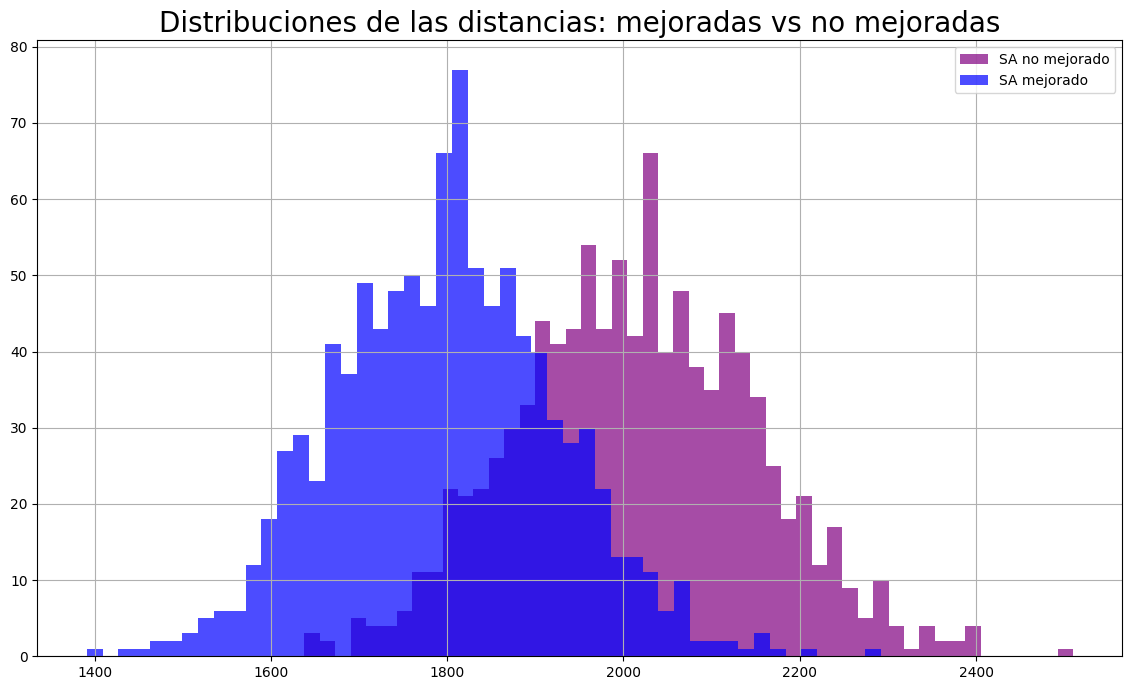

In [17]:
distancias_df['distancias_SA'].hist(figsize = (14,8),
                                    bins = 50,
                                    color = 'purple',
                                    alpha= 0.7,
                                    label = 'SA no mejorado')

distancias_df['distancias_SA_mejoradas'].hist(figsize = (14,8),
                                    bins = 50,
                                    color = 'blue',
                                    alpha = 0.7,
                                    label= 'SA mejorado')

plt.title('Distribuciones de las distancias: mejoradas vs no mejoradas', fontdict= {'fontsize':20})
plt.legend()

plt.show()

In [18]:
distancias_df.describe()

,distancias_SA,distancias_SA_mejoradas
count,1000.000000,1000.000000
mean,2014.330000,1799.091000
std,135.673617,125.492753
min,1638.000000,1391.000000
25%,1920.000000,1710.750000
50%,2015.500000,1800.000000
75%,2110.000000,1882.000000
max,2510.000000,2292.000000


# 06 BÚSQUEDA LOCAL

## algoritmo original

In [19]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  # print("Mejor solución:" , mejor_solucion)
  # print("Distancia     :" , mejor_distancia)
  return mejor_distancia, mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 10000)
print(solucion)

(3708, [0, 2, 19, 15, 17, 38, 24, 32, 33, 20, 29, 30, 22, 8, 28, 3, 39, 11, 10, 1, 37, 16, 4, 23, 12, 26, 21, 9, 18, 40, 34, 36, 31, 7, 41, 25, 14, 27, 6, 5, 13, 35])


In [21]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################

def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100

  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_distancia ,mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion[1], problem))


nueva_solucion = genera_vecina(solucion[1])[1]
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))

Distancia Solucion Incial: 3708
Distancia Mejor Solucion Local: 3385


## algoritmo alernativo 01

En comparación al algoritmo original parece que obtiene mejores resultados a partir de k = 2, como se demostrará a continuación.

### Explicación del algoritmo

A este algoritmo se le pasa un argumento **k (es un hiperparametro)**, y crea grupos de ciudades del tamaño de 2*k +1, pues se basa en un nodo central y escoge las k ciudades a la izquierda y k ciudades a la derecha, creando un subgrupo de ciudades. Despúes, permuta las ciudades del grupo y guarda la mejor solucion local. El bucle da saltos del tamaño del grupo de ciudades * 2, para evitar el solapamiento.

También hay que tener en cuenta las posibles combinaciones con k, dado que no obtiene los mismos resultados para diferentes valores k. Los resultados apuntan a que un mayor número de k se obtienen mejores resultados, pero hay que tener en cuenta que aumenta la complejidad del algoritmo.

In [22]:
def distancia_parcial(solucion, problem):
  distancia_total = 0

  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)

  return distancia_total


def genera_k_vecinos(solucion, k = 1,problem= problem):
  import itertools
  mejor_distancia = distancia_total(solucion, problem)
  mejor_solucion = solucion
  solucion_local = solucion.copy()

  for nodo_central in range(1+k, len(solucion), k*2+1):

    grupo_de_ciudades = solucion[nodo_central-k:nodo_central+k+1]
    permu_grup_ciudades = [*itertools.permutations(grupo_de_ciudades, len(grupo_de_ciudades))]

    grupos_y_distancias = [ (distancia_parcial(list(grupo_permutado), problem), list(grupo_permutado)) for grupo_permutado in permu_grup_ciudades]
    mejor_grupo_de_ciudades = min(grupos_y_distancias)[1]
    # print(mejor_grupo_de_ciudades)
    solucion_local_01 = solucion_local[:nodo_central-k] + mejor_grupo_de_ciudades + solucion_local[nodo_central+k+1:] # esta lista se va modificando poco a poco, es una lista dinámica
    solucion_local_02 = solucion[:nodo_central-k] + mejor_grupo_de_ciudades + solucion[nodo_central+k+1:]             # esta lista solo se cambia el grupo respecto a la original

    distancia_vecina_01 = distancia_total(solucion_local_01, problem)
    distancia_vecina_02 = distancia_total(solucion_local_02, problem)
    mejor_distancia_vecina = min(distancia_vecina_01, distancia_vecina_02)

    if distancia_vecina_02 == mejor_distancia_vecina:
      solucion_local = solucion_local_02
    else:
      solucion_local = solucion_local_01

    # print(solucion_local)
    # print(mejor_distancia_vecina)
    # print('\n')
      #... para guardarla si mejora las anteriores
    if mejor_distancia_vecina <= mejor_distancia:
      mejor_distancia = mejor_distancia_vecina
      mejor_solucion = solucion_local

  return mejor_distancia, mejor_solucion

In [24]:
print(f'distancia total inical:{distancia_total(solucion[1], problem)}')
print('\n')
print(f'distancia_total_final: {genera_k_vecinos(solucion[1], k= 3)}')

distancia total inical:3708


distancia_total_final: (3013, [0, 17, 15, 19, 2, 32, 38, 24, 22, 8, 29, 30, 28, 20, 33, 16, 37, 1, 3, 11, 10, 39, 4, 26, 18, 12, 23, 9, 21, 34, 36, 31, 7, 25, 41, 40, 27, 6, 5, 13, 14, 35])


In [27]:
solucion_aleatoria = busqueda_aleatoria(problem, 10000)
vecina_alternativa = genera_k_vecinos(solucion_aleatoria[1], k= 3)
sol_vecina = genera_vecina(solucion_aleatoria[1])
#vecina = (distancia_total(vecina, problem), vecina)

print(f'distancia total inical:{distancia_total(solucion_aleatoria[1], problem)}')
print('\n')
print(f'distancia_total_final_busqueda local: {sol_vecina}')
print(f'distancia_total_final_busqueda modificada: {vecina_alternativa}')

distancia total inical:3585


distancia_total_final_busqueda local: (3362, [0, 7, 28, 21, 22, 23, 4, 25, 18, 8, 1, 14, 33, 34, 20, 2, 26, 11, 15, 13, 27, 37, 6, 32, 31, 36, 35, 16, 12, 10, 19, 5, 17, 3, 29, 30, 24, 9, 38, 39, 40, 41])
distancia_total_final_busqueda modificada: (2883, [0, 7, 4, 28, 22, 21, 23, 25, 8, 18, 3, 1, 14, 20, 33, 11, 2, 27, 26, 13, 15, 37, 12, 6, 32, 31, 35, 36, 16, 17, 19, 5, 10, 29, 30, 34, 24, 40, 41, 9, 39, 38])


## Comparativa

como en el apartado anterior vamos a comparar graficamente y númericamente las diferentes solcuciones haciendo un multi arranque para cada una de las opciones.

In [28]:
soluciones_aleatorias = [busqueda_aleatoria(problem, 1000) for iteration in range(1000)] # creamos una muestra aleatoria de soluciones de tamaño N = 1000 como antes
print(soluciones_aleatorias)

[(3926, [0, 15, 5, 11, 25, 13, 31, 37, 18, 10, 24, 39, 21, 23, 29, 28, 6, 34, 26, 4, 2, 1, 30, 7, 14, 38, 22, 36, 16, 27, 40, 8, 17, 20, 19, 9, 41, 33, 35, 12, 32, 3]), (3933, [0, 17, 11, 10, 39, 9, 24, 28, 27, 3, 41, 22, 25, 26, 1, 37, 29, 2, 36, 38, 40, 32, 23, 13, 14, 16, 35, 31, 6, 18, 30, 21, 7, 4, 33, 34, 20, 19, 5, 15, 12, 8]), (3798, [0, 32, 29, 18, 23, 24, 30, 7, 5, 10, 39, 21, 22, 28, 2, 11, 25, 4, 31, 38, 9, 8, 27, 3, 14, 16, 15, 34, 33, 1, 12, 13, 36, 6, 37, 35, 40, 17, 19, 26, 41, 20]), (3871, [0, 20, 17, 14, 19, 39, 27, 23, 12, 31, 7, 22, 8, 40, 13, 35, 34, 33, 36, 5, 1, 30, 28, 2, 3, 38, 9, 10, 4, 26, 11, 16, 25, 41, 21, 29, 24, 32, 18, 37, 15, 6]), (3378, [0, 36, 35, 34, 33, 13, 37, 17, 16, 10, 2, 4, 27, 6, 21, 38, 40, 8, 30, 39, 22, 9, 25, 41, 1, 11, 18, 3, 29, 32, 31, 7, 28, 24, 23, 26, 20, 5, 19, 14, 15, 12]), (3858, [0, 6, 9, 39, 29, 25, 10, 8, 31, 38, 32, 1, 15, 19, 18, 23, 41, 11, 40, 4, 17, 13, 5, 2, 16, 33, 20, 12, 35, 14, 37, 30, 34, 28, 36, 3, 26, 7, 27, 21, 2

In [29]:
distancias_aleatorias = [soluciones_aleatorias[i][0] for i in range(1000)]

In [30]:
print(soluciones_aleatorias[900][1])

[0, 1, 20, 34, 33, 31, 18, 14, 7, 2, 21, 22, 24, 39, 9, 30, 15, 6, 3, 37, 36, 27, 35, 32, 38, 5, 10, 23, 40, 29, 28, 17, 16, 26, 4, 12, 8, 11, 13, 19, 41, 25]


In [31]:
soluciones_vecinas_original = [genera_vecina(soluciones_aleatorias[i][1]) for i in range(len(soluciones_aleatorias))]
print(soluciones_vecinas_original)

[(3601, [0, 15, 5, 11, 25, 13, 31, 37, 18, 10, 24, 39, 21, 23, 29, 28, 6, 12, 26, 4, 2, 1, 30, 7, 14, 38, 22, 36, 16, 27, 40, 8, 17, 20, 19, 9, 41, 33, 35, 34, 32, 3]), (3526, [0, 17, 11, 10, 39, 9, 24, 28, 27, 3, 41, 22, 25, 26, 1, 37, 29, 2, 36, 38, 40, 21, 23, 13, 14, 16, 35, 31, 6, 18, 30, 32, 7, 4, 33, 34, 20, 19, 5, 15, 12, 8]), (3373, [0, 32, 29, 18, 23, 24, 30, 7, 5, 10, 39, 21, 22, 28, 2, 11, 25, 4, 40, 38, 9, 8, 27, 3, 14, 16, 15, 34, 33, 1, 12, 13, 36, 6, 37, 35, 31, 17, 19, 26, 41, 20]), (3574, [0, 20, 17, 14, 19, 13, 27, 23, 12, 31, 7, 22, 8, 40, 39, 35, 34, 33, 36, 5, 1, 30, 28, 2, 3, 38, 9, 10, 4, 26, 11, 16, 25, 41, 21, 29, 24, 32, 18, 37, 15, 6]), (3037, [0, 36, 35, 34, 33, 20, 37, 17, 16, 10, 2, 4, 27, 6, 21, 38, 40, 8, 30, 39, 22, 9, 25, 41, 1, 11, 18, 3, 29, 32, 31, 7, 28, 24, 23, 26, 13, 5, 19, 14, 15, 12]), (3455, [0, 6, 9, 39, 29, 25, 10, 8, 31, 38, 32, 1, 15, 19, 18, 23, 41, 11, 40, 4, 17, 13, 5, 2, 16, 33, 20, 36, 35, 14, 37, 30, 34, 28, 12, 3, 26, 7, 27, 21, 2

In [32]:
distancias_vecinas = [soluciones_vecinas_original[i][0] for i in range(1000)]

In [33]:
# esto no es lo correcto ni lo más eficiente, pero lo quiero separadito

for k in range(1,4):
  if k == 1:
    vecinas_alternativa_k1 = [genera_k_vecinos(soluciones_aleatorias[i][1], k) for i in range(len(soluciones_aleatorias))]
  if k == 2:
    vecinas_alternativa_k2 = [genera_k_vecinos(soluciones_aleatorias[i][1], k) for i in range(len(soluciones_aleatorias))]
  if k == 3:
    vecinas_alternativa_k3 = [genera_k_vecinos(soluciones_aleatorias[i][1], k) for i in range(len(soluciones_aleatorias))]

print(vecinas_alternativa_k1)
print(vecinas_alternativa_k2)
print(vecinas_alternativa_k3)

[(3610, [0, 15, 5, 11, 25, 13, 31, 37, 18, 10, 24, 21, 39, 23, 29, 28, 26, 6, 34, 1, 4, 2, 14, 7, 30, 22, 38, 36, 16, 27, 40, 8, 20, 17, 9, 41, 19, 12, 33, 35, 32, 3]), (3533, [0, 17, 11, 10, 9, 39, 24, 3, 27, 28, 22, 41, 25, 26, 1, 37, 29, 2, 36, 32, 38, 40, 23, 13, 14, 16, 35, 31, 6, 18, 30, 21, 7, 4, 33, 34, 20, 19, 5, 15, 12, 8]), (3610, [0, 32, 29, 18, 23, 24, 30, 7, 5, 10, 39, 21, 22, 28, 2, 11, 25, 4, 31, 38, 9, 8, 27, 3, 14, 16, 15, 34, 33, 1, 12, 13, 6, 36, 35, 37, 40, 17, 19, 26, 41, 20]), (3688, [0, 20, 17, 14, 19, 27, 39, 23, 12, 31, 7, 8, 22, 40, 13, 35, 34, 33, 36, 5, 1, 30, 28, 2, 3, 38, 9, 10, 4, 26, 11, 16, 25, 41, 21, 29, 24, 32, 18, 37, 15, 6]), (3248, [0, 36, 35, 34, 33, 13, 37, 17, 16, 10, 4, 2, 27, 6, 38, 21, 40, 8, 30, 39, 22, 9, 25, 41, 1, 11, 18, 3, 29, 32, 31, 7, 28, 24, 23, 26, 20, 5, 19, 14, 15, 12]), (3652, [0, 6, 9, 39, 29, 25, 10, 8, 31, 38, 32, 1, 15, 19, 18, 23, 41, 11, 40, 4, 17, 13, 5, 2, 16, 33, 20, 12, 14, 37, 35, 28, 30, 34, 36, 3, 26, 7, 27, 21, 2

In [34]:
distancias_k1 = [vecinas_alternativa_k1[i][0] for i in range(1000)]
distancias_k2 = [vecinas_alternativa_k2[i][0] for i in range(1000)]
distancias_k3 = [vecinas_alternativa_k3[i][0] for i in range(1000)]

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
array_distancias = np.array(list(zip(distancias_aleatorias, distancias_vecinas, distancias_k1, distancias_k2, distancias_k3)))

In [37]:
df_vecinos_alt = pd.DataFrame(array_distancias, columns = ['distancia_aleatoria', 'distancias_vecinas', 'k_1', 'k_2', 'k_3'])

df_vecinos_alt.sample(5)

,distancia_aleatoria,distancias_vecinas,k_1,k_2,k_3
226,3727,3217,3450,3064,2846
303,3841,3553,3683,3320,3059
185,3843,3565,3673,3311,2935
230,3998,3697,3859,3667,2858
789,3933,3673,3664,3574,3282


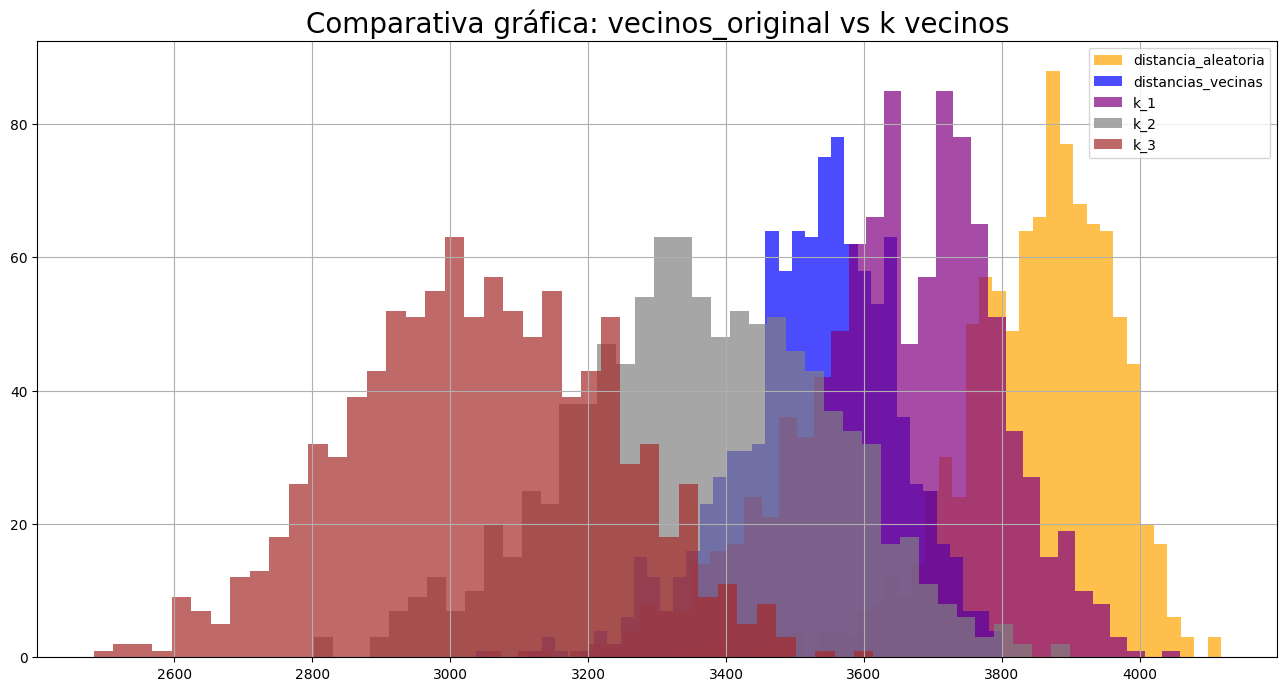

In [40]:
colores = ['orange', 'blue', 'purple', 'grey', 'brown']

dct_cols_colors = dict(zip(df_vecinos_alt.columns, colores))

for column,color in dct_cols_colors.items():

  df_vecinos_alt[column].hist(figsize = (16,8),
                                    bins = 40,
                                    color = color,
                                    alpha= 0.7,
                                    label = column,
                                    grid= True)

plt.title('Comparativa gráfica: vecinos_original vs k vecinos', fontdict = {'fontsize':20})
plt.legend()
plt.show()

### Conclusiones

Ambas mejoras implementadas en el SA y la generaciónd de vecinos mejoran las originales.

Algo que me ha llamado la atención es que la implementación de k vecinos presenta unas distribuciones con las colas más largas(menos curtosis), es decir, con más varianza, y por lo tanto, se podría decir que diversifica más que la generación de vecinos normal

Cada vez que implemento una mejora se me ocurren dos más.

# MI MEJOR SOLUCIÓN PARA EL TSP

Hasta el momento mi mejor solucion ha sido la siguiente, conseguida por el recocido simulado mejorado:

(1391, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 27, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 28, 2])

Voy a intentar mejorarla mediante diferentes metodos de generación de vecinos.

In [41]:
mi_mejor_solucion = (1391, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 27, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 28, 2])

## busqueda_vecina_normal

In [44]:
mejor_solucion_vecina = genera_vecina(mi_mejor_solucion[1])

print(mejor_solucion_vecina) # ya la hemos mejorado

(1342, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 28, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 27, 2])


## busqueda de k vecinos

In [45]:
mejor_solucion_k = genera_k_vecinos(mi_mejor_solucion[1], k = 3) # escojo el k que mejores resultados me da

print(mejor_solucion_k) # a mejorado mi solución,pero no la busqueda vecina normal

(1386, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 27, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 2, 28])


## combinando métodos

In [49]:
mejor_solucion_vecina_luego_k = genera_k_vecinos(mejor_solucion_vecina[1], k = 3)
print(mejor_solucion_vecina_luego_k) # conseguimos mejorar aún más la solucion

(1340, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 28, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 2, 27])


In [47]:
mejor_solucion_k_luego_vecina = genera_vecina(mejor_solucion_k[1])
print(mejor_solucion_k_luego_vecina) # se consigue la msima respuesta

(1340, [0, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 40, 24, 21, 39, 22, 38, 30, 29, 28, 32, 34, 33, 20, 35, 36, 31, 17, 1, 6, 4, 3, 2, 27])
